<a href="https://colab.research.google.com/github/malakbayramovaa/Machine-Learning/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The below column reference:
**step** – zaman addımı (məsələn, 1 = 1-ci saat və ya 1-ci interval)

**type** – əməliyyat növü

* PAYMENT (ödəmə)

* TRANSFER (köçürmə)

* CASH_OUT (nağdlaşdırma)

* DEBIT və s.

**amount** – göndərilən məbləğ

**nameOrig** – göndərən hesab ID-si

**oldbalanceOrg** – göndərənin əvvəlki balansı

**newbalanceOrig** – göndərənin əməliyyatdan sonrakı balansı

**nameDest** – alan hesab ID-si

**oldbalanceDest** – alanın əvvəlki balansı

**newbalanceDest** – alanın son balansı

**isFraud** – ⭐ ən vacib sütun:

* 1 → fırıldaqçılıqdır

* 0 → normal əməliyyatdır

**isFlaggedFraud** – sistem tərəfindən şübhəli kimi işarələnib, ya yox

In [1]:
import pandas as pd
df=pd.read_csv('/content/Online Payments Fraud Detection.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Əsas faydalı sütunlar:

**step** – zaman pattern-lərini tuta bilər

**type** – əməliyyat növü (çox önəmlidir!)

**amount** – ən güclü feature-lərdən biri

**oldbalanceOrg**

**newbalanceOrig**

**oldbalanceDest**

**newbalanceDest**

Bu balans sütunlarından model çox yaxşı öyrənir:

məsələn: balans 0 olur amma böyük transfer gedir → şübhəli pattern

In [2]:
df.shape

(6362620, 11)

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df = df.drop(columns = ['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

**Diqqət: target leakage olan sütun**

Bu sütuna xüsusi diqqət!

**isFlaggedFraud**
Bu sütun artıq sistemin verdiyi qərardır.
Əgər sən bunu modelə versən → model cheat edəcək.

Buna görə:

Train zamanı bu sütunu da silmək lazımdır

In [9]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [10]:
df = df.dropna(subset=['isFraud'])

In [11]:
X = df.drop('isFraud', axis = 1)
y = df['isFraud'].copy()

In [12]:
X.shape, y.shape

((6362620, 9), (6362620,))

# Hansı model daha yaxşı işləyir (fraud dataset üçün)?

**Bu tip dataset:**

Binary classification-dır

Class imbalance var (fraud çox az olur)

Pattern-lər non-linear olur

**Ona görə də modellərin performansı belə olur:**

**Ən yaxşı işləyənlər**
Random Forest

Fraud detection üçün çox güclüdür

Outlier-ləri yaxşı tutur

Feature engineering olmadan belə yaxşı nəticə verir

**Ən yaxşı başlanğıc modeli**

XGBoost / LightGBM / CatBoost

Industry standard fraud modellər

Banking sistemlərində real istifadə olunur


In [13]:
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


In [14]:
pd.crosstab(df['type'], df['isFraud'], normalize='index')


isFraud,0,1
type,,
CASH_IN,1.000000,0.000000
CASH_OUT,0.998160,0.001840
DEBIT,1.000000,0.000000
PAYMENT,1.000000,0.000000
TRANSFER,0.992312,0.007688


In [15]:
df.groupby('isFraud')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,6354407.0,1.781970e+05,5.962370e+05,0.01,13368.395,74684.72,208364.76,92445516.64
1,8213.0,1.467967e+06,2.404253e+06,0.00,127091.330,441423.44,1517771.48,10000000.00


In [16]:
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

,isFraud
isFraud,1.000000
balanceDiffOrig,0.362472
amount,0.076688
step,0.031578
oldbalanceOrg,0.010154
newbalanceDest,0.000535
oldbalanceDest,-0.005885
newbalanceOrig,-0.008148
balanceDiffDest,-0.027028


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

**stratify=y** → fraud nisbətini train və test-də eyni saxlayır.

In [18]:
df['isFraud'].value_counts(dropna=False)


,count
isFraud,
0,6354407
1,8213


In [19]:
import numpy as np

X_num = X_train.select_dtypes(include = np.number)
X_cat = X_train.select_dtypes(include=['object'])

In [20]:
X_num

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest
292779,15,9914.74,44248.00,34333.26,0.00,0.00,9914.74,0.00
499763,20,6854.53,0.00,0.00,0.00,0.00,0.00,0.00
2970411,231,361211.80,0.00,0.00,489745.16,850956.95,0.00,-361211.79
3137549,236,7083.51,0.00,0.00,0.00,0.00,0.00,0.00
1500682,143,218019.51,13045685.58,13263705.09,2438123.98,2220104.47,-218019.51,218019.51
...,...,...,...,...,...,...,...,...
1524870,153,1895.99,0.00,0.00,0.00,0.00,0.00,0.00
5834821,402,347110.99,103785.00,0.00,87871.75,434982.74,103785.00,-347110.99
4182953,304,13259.63,0.00,0.00,0.00,0.00,0.00,0.00
3985280,298,24122.92,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
X_cat

,type
292779,PAYMENT
499763,PAYMENT
2970411,CASH_OUT
3137549,PAYMENT
1500682,CASH_IN
...,...
1524870,PAYMENT
5834821,CASH_OUT
4182953,PAYMENT
3985280,PAYMENT


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),

])

X_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

num_features = X_train.select_dtypes(include=np.number).columns
cat_features = X_train.select_dtypes(include = ['object']).columns

transformer = ColumnTransformer([
    ('num', X_num_pipeline, num_features),
    ('cat', X_cat_pipeline, cat_features)
])

# X_train_transformed = pd.DataFrame(transformer.fit_transform(X_train), columns = transformer.get_feature_names_out())
# X_test_transformed = pd.DataFrame(transformer.transform(X_test), columns = transformer.get_feature_names_out())

In [26]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

pipeline = ImbPipeline([
    ('transformer', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

pipeline.fit(X_train, y_train)

y_prob = pipeline.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


[[1269824    1057]
 [     34    1609]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.60      0.98      0.75      1643

    accuracy                           1.00   1272524
   macro avg       0.80      0.99      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC: 0.9990103047847941


In [27]:
!pip install xgboost


In [28]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

xgb_pipeline = ImbPipeline([
    ('transformer', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [29]:
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_xgb = (y_prob_xgb >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


[[1266373    4508]
 [      9    1634]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.27      0.99      0.42      1643

    accuracy                           1.00   1272524
   macro avg       0.63      1.00      0.71   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC: 0.9995345626220004


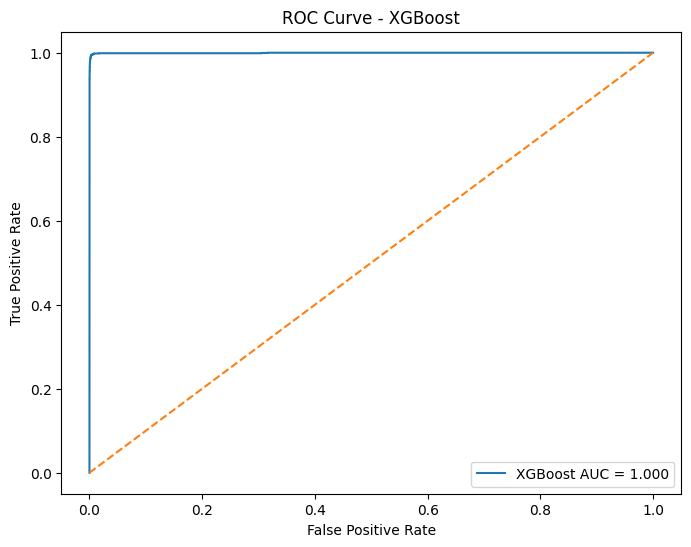

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


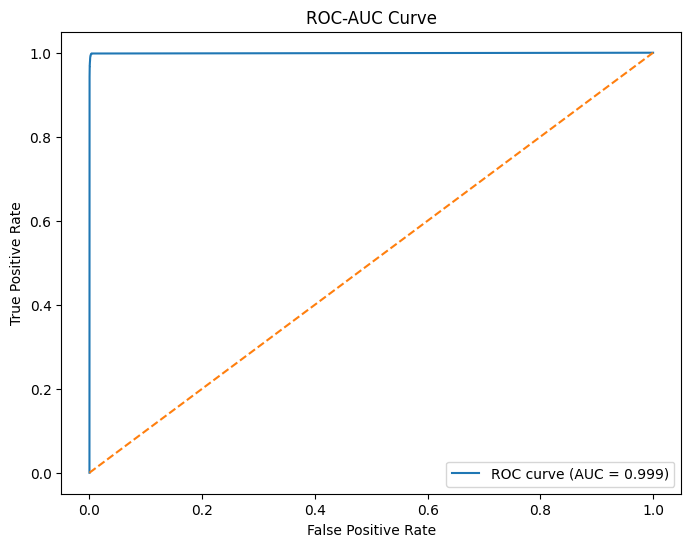

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

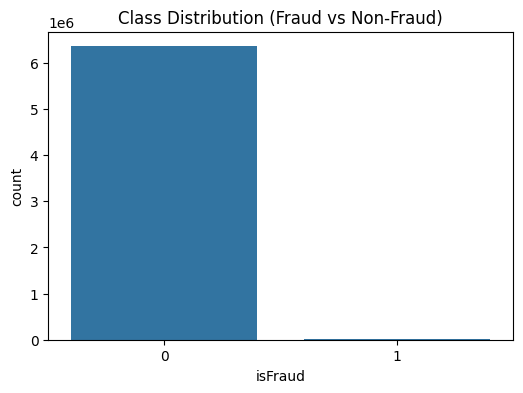

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


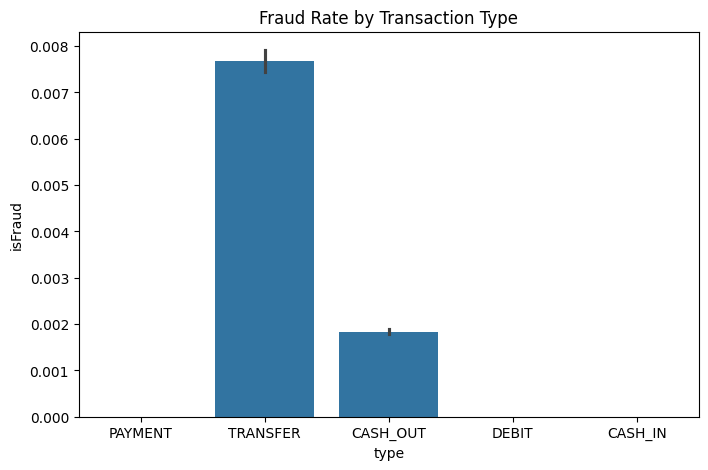

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='isFraud', data=df)
plt.title("Fraud Rate by Transaction Type")
plt.show()


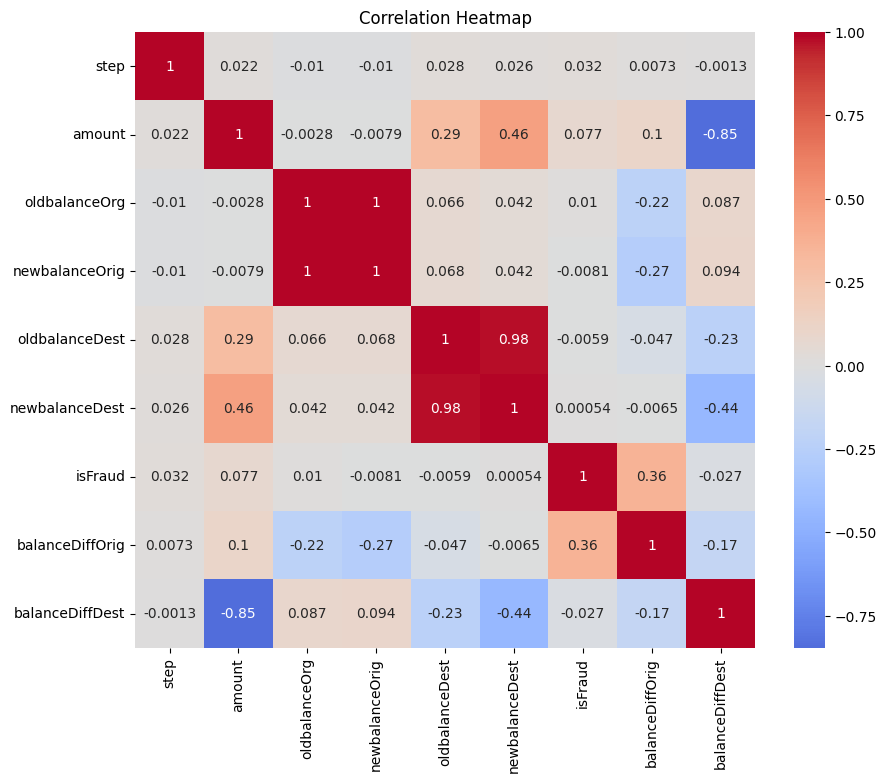

In [37]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()


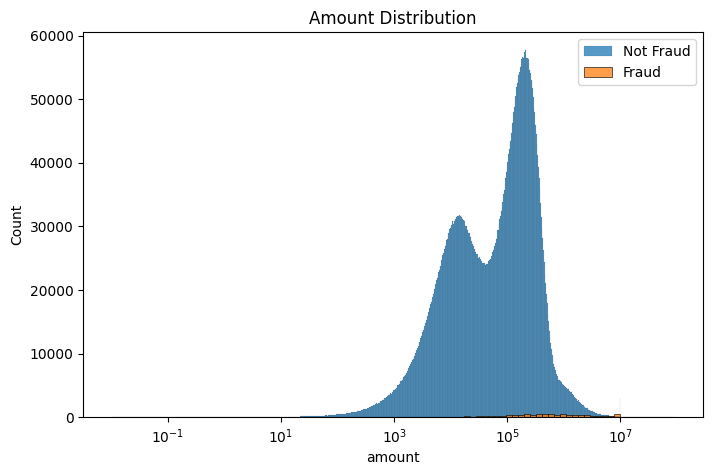

In [38]:
plt.figure(figsize=(8,5))

sns.histplot(df[df['isFraud']==0]['amount'], label='Not Fraud', log_scale=True)
sns.histplot(df[df['isFraud']==1]['amount'], label='Fraud', log_scale=True)

plt.legend()
plt.title("Amount Distribution")
plt.show()


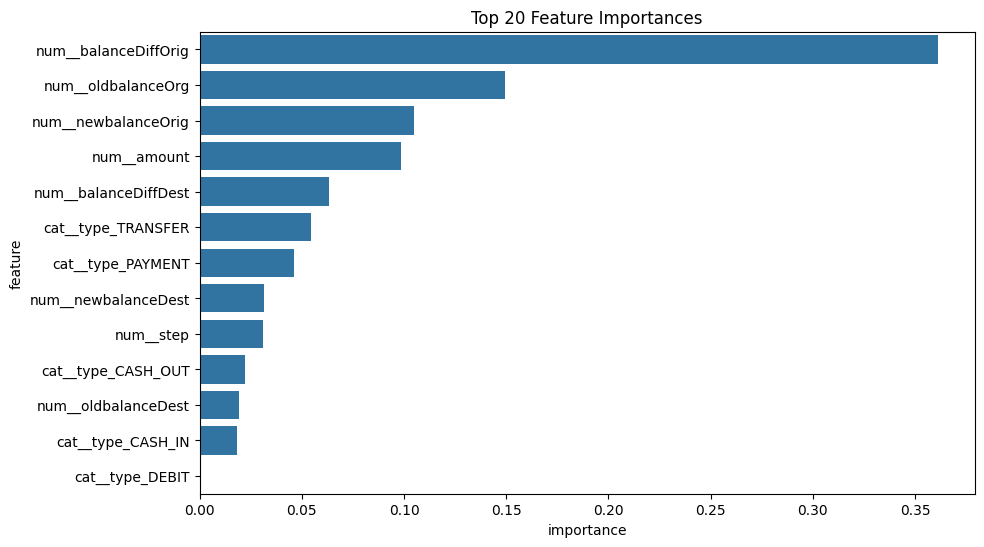

In [36]:
feature_names = pipeline.named_steps['transformer'].get_feature_names_out()
importances = pipeline.named_steps['model'].feature_importances_

fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=fi)
plt.title("Top 20 Feature Importances")
plt.show()
